# Import necessary packages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import any packages you need here
from matplotlib.pyplot import (
    boxplot,
    figure,
    hist,
    show,
    subplot,
    title,
    xlabel,
    xticks,
    ylim,
    yticks,
)

from scipy.stats import zscore

# define data file name
data_file = "../project1_data/Rice_Cammeo_Osmancik.csv"
#load data
data = pd.read_csv(data_file)
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


# Remove non-numeric columns

In [16]:
data_numeric = data.select_dtypes(include=[np.number])

# Outliers: boxplot

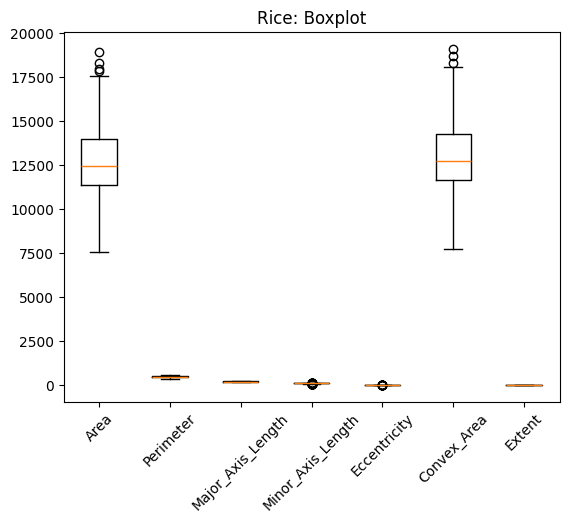

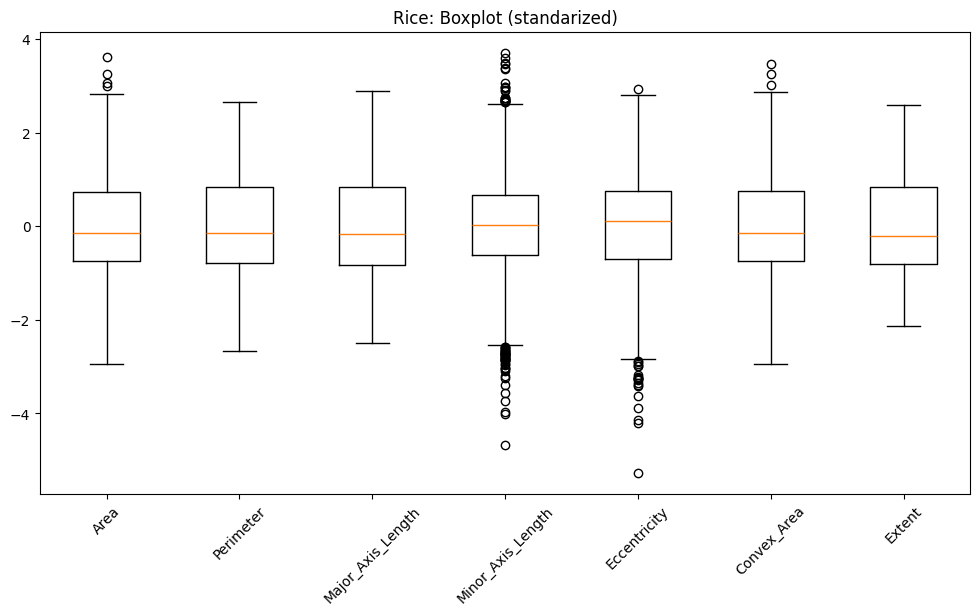

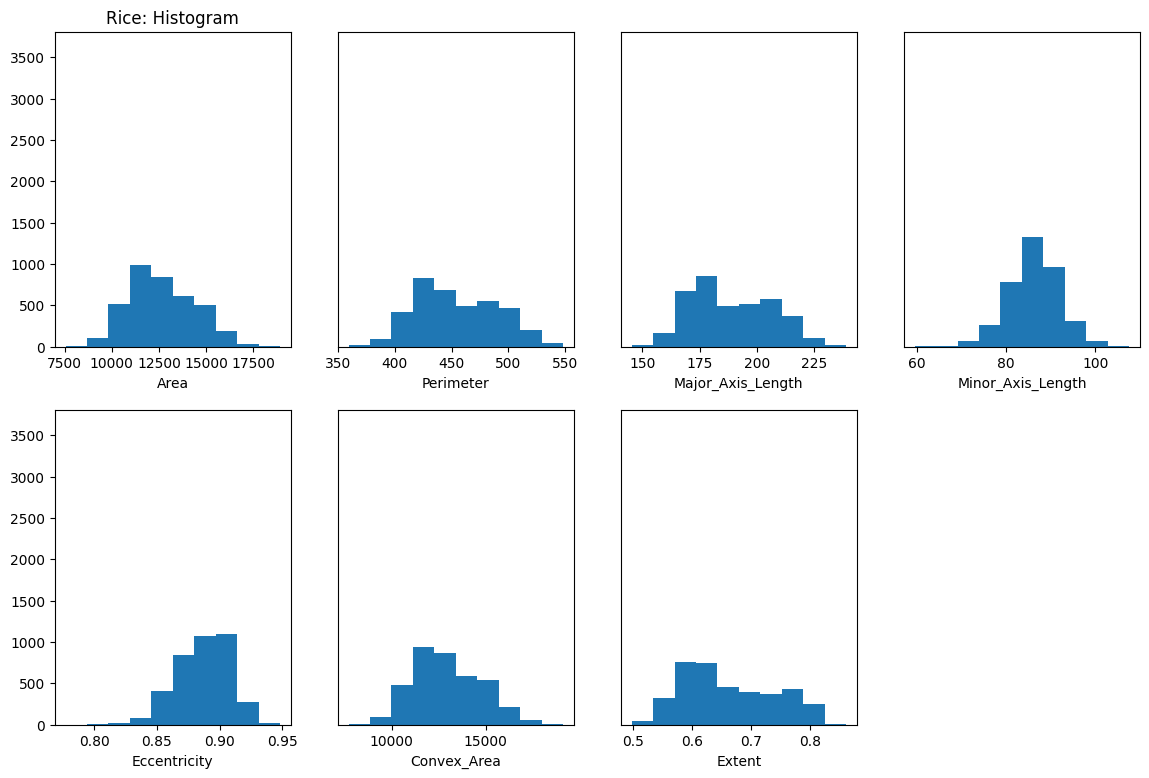

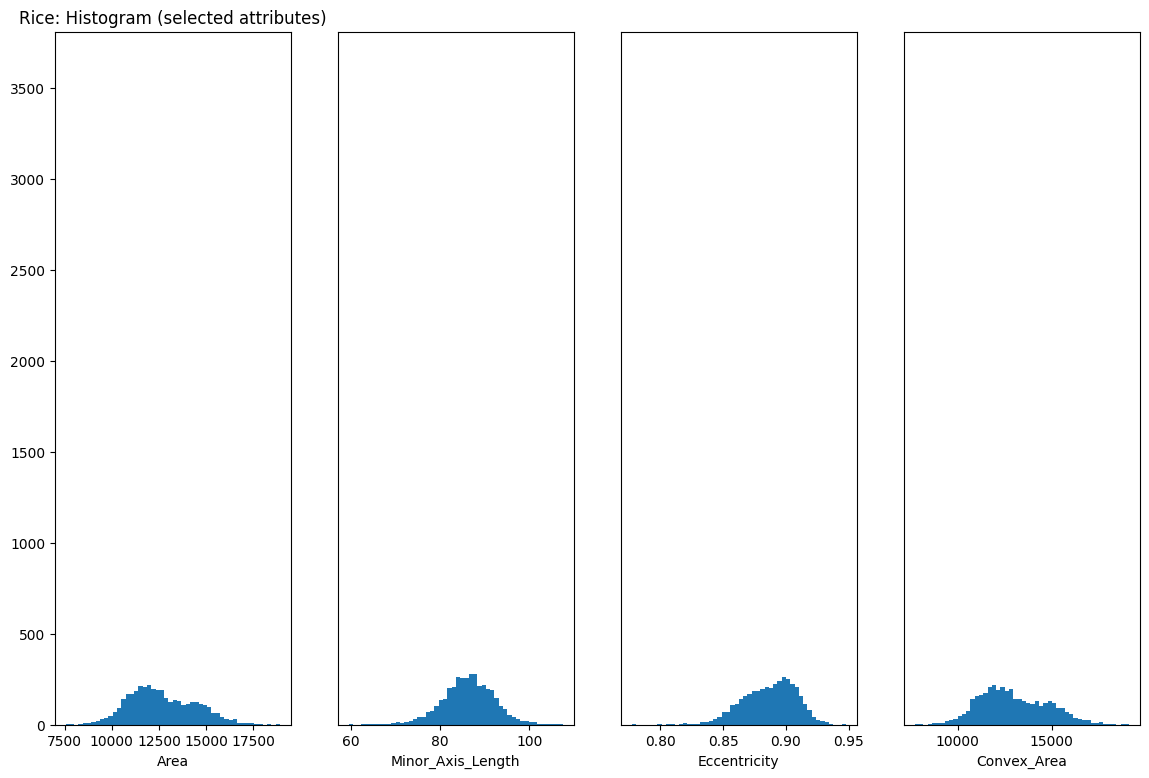

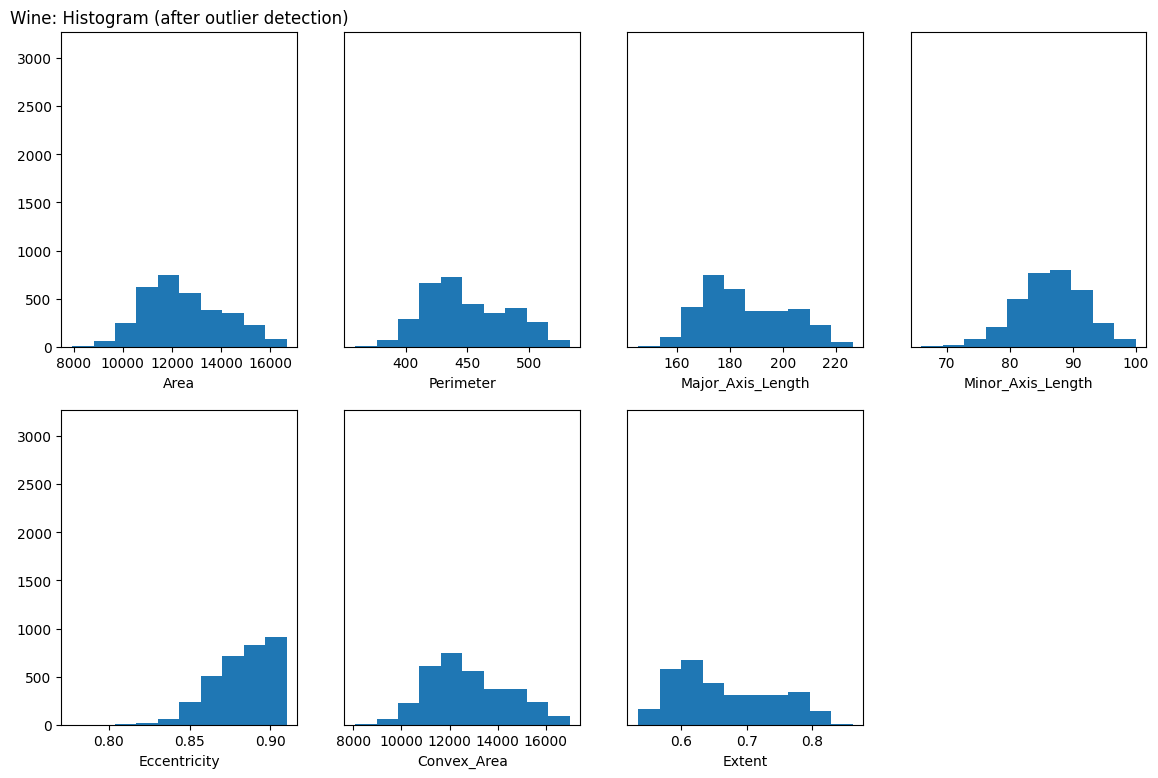

Ran project1_data Outliers


In [17]:
# Xu writes his code here
filename = data_file 

# Load CSV data file and extract variables of interest
df = pd.read_csv(filename)
#remove labels
raw_data = df.values 

# data
cols = range(0, 7)
X_raw = raw_data[:, cols]
X = X_raw.astype('float64')
# print(np.shape(X))
# print(X)
# print(type(X))
# class_sum
attributeNames = np.array(df.columns[cols])
# print(attributeNames)
classLabels = np.array(raw_data[:, -1]) 
classNames = np.unique(classLabels)
C = np.array(int(len(classNames)))

# class: convert into the number
y = np.empty(X.shape[0])
for i in range(0,X.shape[0]):
    if(raw_data[i, 7] == "b'Cammeo'"):
        y[i] = 0
    else:
        y[i] = 1
y = y.astype(int)
# print(y)
# attribute_num
M = np.array((len(attributeNames)))
# print(M)
# sample_num
N = np.array((len(y)))


# We start with a box plot of each attribute
figure()
title("Rice: Boxplot")
boxplot(X)
xticks(range(1, M + 1), attributeNames, rotation=45)
# show()

# From this it is clear that there are some outliers in the Alcohol
# attribute (10x10^14 is clearly not a proper value for alcohol content)
# However, it is impossible to see the distribution of the data, because
# the axis is dominated by these extreme outliers. To avoid this, we plot a
# box plot of standardized data (using the zscore function).
figure(figsize=(12, 6))
title("Rice: Boxplot (standarized)")
boxplot(zscore(X, ddof=1))
xticks(range(1, M + 1), attributeNames, rotation=45)
# show()
# This plot reveals that there are clearly some outliers in the Volatile
# acidity, Density, and Alcohol attributes, i.e. attribute number 2, 8,
# and 11.

# Next, we plot histograms of all attributes.
figure(figsize=(14, 9))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    subplot(int(u), int(v), i + 1)
    hist(X[:, i])
    xlabel(attributeNames[i])
    ylim(0, N)  # Make the y-axes equal for improved readability
    if i % v != 0:
        yticks([])
    if i == 0:
        title("Rice: Histogram")


# This confirms our belief about outliers in attributes 2, 8, and 11.
# To take a closer look at this, we next plot histograms of the
# attributes we suspect contains outliers
figure(figsize=(14, 9))
m = [0, 3, 4, 5]
for i in range(len(m)):
    subplot(1, len(m), i + 1)
    hist(X[:, m[i]], 50)
    xlabel(attributeNames[m[i]])
    ylim(0, N)  # Make the y-axes equal for improved readability
    if i > 0:
        yticks([])
    if i == 0:
        title("Rice: Histogram (selected attributes)")
# show()

# The histograms show that there are a few very extreme values in these
# three attributes. To identify these values as outliers, we must use our
# knowledge about the data set and the attributes. Say we expect volatide
# acidity to be around 0-2 g/dm^3, density to be close to 1 g/cm^3, and
# alcohol percentage to be somewhere between 5-20 % vol. Then we can safely
# identify the following outliers, which are a factor of 10 greater than
# the largest we expect.

###############################################################################
###############################################################################
###############################################################################
outlier_mask = (X[:, 0] > 17000) | (X[:, 3] > 100) | (X[:, 4] > 0.91) | (X[:, 5] > 17000)
valid_mask = np.logical_not(outlier_mask)

# Finally we will remove these from the data set
X = X[valid_mask, :]
y = y[valid_mask]
N = len(y)


# Now, we can repeat the process to see if there are any more outliers
# present in the data. We take a look at a histogram of all attributes:
figure(figsize=(14, 9))
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    subplot(int(u), int(v), i + 1)
    hist(X[:, i])
    xlabel(attributeNames[i])
    ylim(0, N)  # Make the y-axes equal for improved readability
    if i % v != 0:
        yticks([])
    if i == 0:
        title("Wine: Histogram (after outlier detection)")

# This reveals no further outliers, and we conclude that all outliers have
# been detected and removed.

show()

print("Ran project1_data Outliers")


# Check normality: Q-Q plot

In [ ]:
# Zhong writes his code here

# Check corrolation: corrolation matrix and heatplot

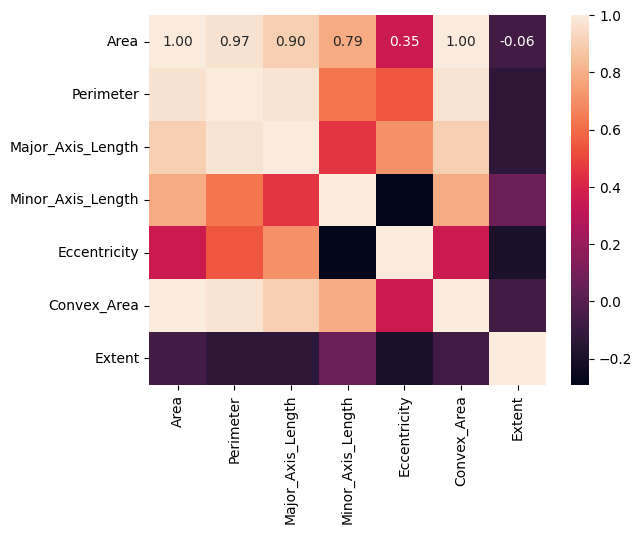

In [18]:
correlation_matrix = data_numeric.corr()

plt.figure()
sns.heatmap(correlation_matrix, annot=correlation_matrix.values, fmt=".2f",)
plt.show()

# PCA

In [ ]:
# Working together